In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

**Importar Librerías**

---

In [89]:
#importar librerias
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [90]:
# Podemos instalar  Textblob  en el caso de querer realizar analisis de sentimiento

---

**Función para cargar los archivos CSV**

---

In [91]:
import csv
#Crea la lista vacía para almacenar el csv
filas = []

# Abre el archivo en modo lectura
with open('/content/drive/MyDrive/MLOPS - ALLAN/3- ETL_CSV/data_reviews_etl.csv', 'r') as archivo_csv:
    # Crea un objeto lector CSV
    lector_csv = csv.reader(archivo_csv)
    encabezados = next(lector_csv)
    # Itera sobre las filas del archivo CSV
    for fila in lector_csv:
        filas.append(fila)

# Transpone la lista de filas para convertirla en columnas
data_reviews = pd.DataFrame(filas, columns=encabezados)

# Muestra el DataFrame
data_reviews.head()


,user_id,user_url,posted,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,Posted February 3.,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,"Posted October 14, 2013.",250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,"Posted April 15, 2014.",211420,35 of 43 people (81%) found this review helpful,True,Git gud


Analisis Exploratorio (EDA)

In [92]:
# Mostrar información general sobre el DataFrame
print(data_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55832 entries, 0 to 55831
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    55832 non-null  object
 1   user_url   55832 non-null  object
 2   posted     55832 non-null  object
 3   item_id    55832 non-null  object
 4   helpful    55832 non-null  object
 5   recommend  55832 non-null  object
 6   review     55832 non-null  object
dtypes: object(7)
memory usage: 3.0+ MB
None


In [93]:
# Resumen estadístico de las variables numéricas
print(data_reviews.describe())

       user_id user_url                 posted item_id         helpful  \
count    55832    55832                  55832   55832           55832   
unique   25459    25459                   1868    3575            1304   
top                      Posted June 21, 2014.     730  No ratings yet   
freq     30061    30061                    222    3667           27430   

       recommend     review  
count      55832      55832  
unique         1      52074  
top         True  good game  
freq       55832         97  


In [105]:
# EDA básico
print(data_reviews.info())
print(data_reviews.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55832 entries, 0 to 55831
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             55832 non-null  object
 1   user_url            55832 non-null  object
 2   posted              55832 non-null  object
 3   item_id             55832 non-null  object
 4   helpful             55832 non-null  object
 5   recommend           55832 non-null  object
 6   sentiment_analysis  55832 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ MB
None
       sentiment_analysis
count        55832.000000
mean             1.350498
std              0.810457
min              0.000000
25%              1.000000
50%              2.000000
75%              2.000000
max              2.000000


In [97]:
import pandas as pd
from textblob import TextBlob


# Crear la columna 'sentiment_analysis' basada en el análisis de sentimiento
def analyze_sentiment(text):
    if pd.isnull(text):  # Si la reseña es nula, asignar 1 (neutral)
        return 1
    else:
        polarity = TextBlob(str(text)).sentiment.polarity
        if polarity < 0:
            return 0  # Malo
        elif polarity == 0:
            return 1  # Neutral
        else:
            return 2  # Positivo

data_reviews['sentiment_analysis'] = data_reviews['review'].apply(analyze_sentiment)

# Reemplazar la columna 'review' con 'sentiment_analysis'
#data_reviews['review'] = data_reviews['sentiment_analysis']

# Mostrar las primeras filas del DataFrame resultante
print(data_reviews.head())

             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
2          evcentric             http://steamcommunity.com/id/evcentric   
3              doctr                 http://steamcommunity.com/id/doctr   
4          maplemage             http://steamcommunity.com/id/maplemage   

                     posted item_id  \
0  Posted November 5, 2011.    1250   
1     Posted June 24, 2014.  251610   
2        Posted February 3.  248820   
3  Posted October 14, 2013.  250320   
4    Posted April 15, 2014.  211420   

                                           helpful recommend  \
0                                   No ratings yet      True   
1  15 of 20 people (75%) found this review helpful      True   
2                                   No ratings yet      True   
3   2 of 2 people (100%) found this review helpful      Tr

'**2.0. VIZUALIZACIÓN DE DATOS**'

In [98]:
#EDA  Exploratory Data Analysis

In [ ]:
data_reviews.describe()

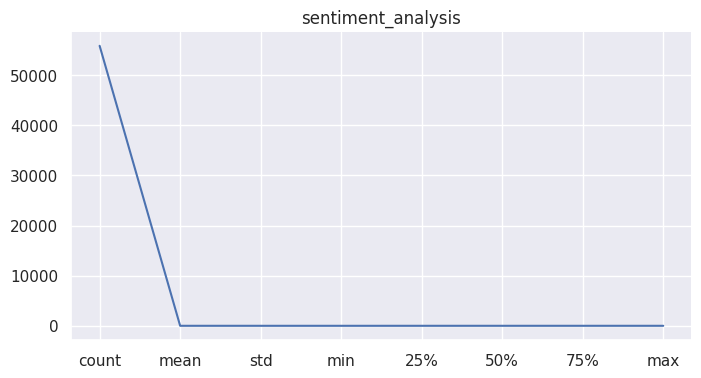

In [100]:
#ploteamos los datos en la distribucion de valores
from matplotlib import pyplot as plt
_df_1['sentiment_analysis'].plot(kind='line', figsize=(8, 4), title='sentiment_analysis')
plt.gca().spines[['top', 'right']].set_visible(False)

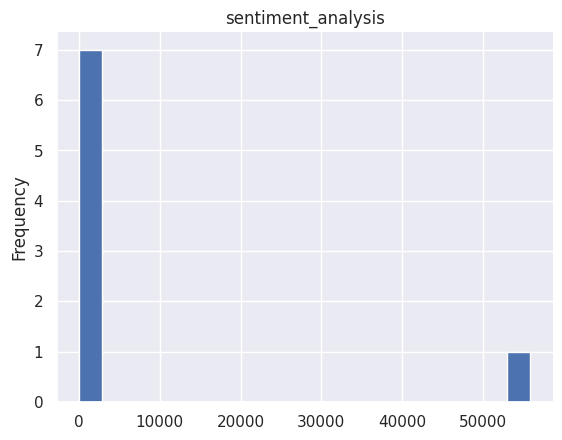

In [101]:
#ploteamos los datos en la distribucion de frecuencia
from matplotlib import pyplot as plt
_df_0['sentiment_analysis'].plot(kind='hist', bins=20, title='sentiment_analysis')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [102]:
print(data_reviews.columns)

Index(['user_id', 'user_url', 'posted', 'item_id', 'helpful', 'recommend',
       'review', 'sentiment_analysis'],
      dtype='object')


In [103]:
data_reviews.drop('review', axis=1, inplace=True)

In [104]:
data_reviews.head()

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,2
2,evcentric,http://steamcommunity.com/id/evcentric,Posted February 3.,248820,No ratings yet,True,2
3,doctr,http://steamcommunity.com/id/doctr,"Posted October 14, 2013.",250320,2 of 2 people (100%) found this review helpful,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,"Posted April 15, 2014.",211420,35 of 43 people (81%) found this review helpful,True,1


In [106]:
data_reviews_copy = data_reviews[['recommend', 'sentiment_analysis']].copy()

In [ ]:
data_reviews_copy.head()

In [108]:
data_reviews_copy.value_counts()

recommend  sentiment_analysis
True       2                     31550
           1                     12301
           0                     11981
dtype: int64

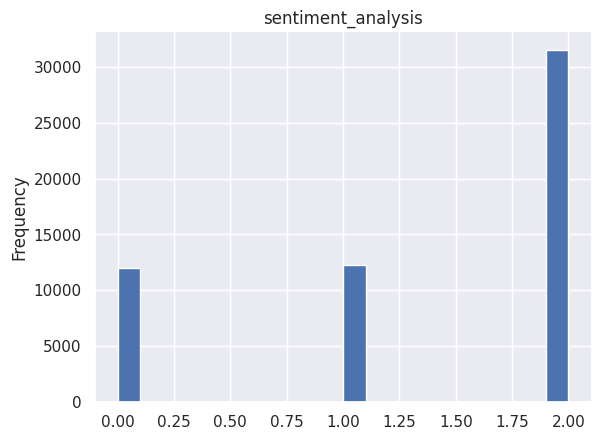

In [109]:
data_reviews_copy['sentiment_analysis'].plot(kind='hist', bins=20, title='sentiment_analysis')
plt.gca().spines[['top', 'right',]].set_visible(False)

---

**Modelo de Recomendación**

def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.

---


In [110]:
import pandas as pd
import string
import re

df= pd.read_csv('/content/drive/MyDrive/MLOPS - ALLAN/3- ETL_CSV/data_games_etl.csv')

In [111]:
# Mostrar información general sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30738 entries, 0 to 30737
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22960 non-null  object 
 1   genres        27605 non-null  object 
 2   app_name      30737 non-null  object 
 3   title         28805 non-null  object 
 4   url           30738 non-null  object 
 5   release_date  28801 non-null  object 
 6   tags          30607 non-null  object 
 7   reviews_url   30736 non-null  object 
 8   specs         30085 non-null  object 
 9   price         30738 non-null  float64
 10  early_access  30738 non-null  float64
 11  id            30736 non-null  float64
 12  developer     27584 non-null  object 
dtypes: float64(3), object(10)
memory usage: 3.0+ MB
None


In [112]:
# Resumen estadístico de las variables numéricas
print(df.describe())

              price  early_access            id
count  30738.000000  30738.000000  3.073600e+04
mean       8.872624      0.060186  4.522553e+05
std       15.907021      0.237835  1.834391e+05
min        0.000000      0.000000  1.000000e+01
25%        2.990000      0.000000  3.288875e+05
50%        4.990000      0.000000  4.547750e+05
75%        9.990000      0.000000  5.943625e+05
max      995.000000      1.000000  2.028850e+06


In [113]:
# Imprimir lista de columnas
print("Columnas disponibles:", df.columns)

Columnas disponibles: Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')


In [114]:

# Histogramas de variables numéricas
numerical_cols = ['posted', 'helpful', 'recommend']  # Selecciona las columnas numéricas relevantes

In [115]:
# Verificar si las columnas existen antes de generar histogramas
if all(col in df.columns for col in numerical_cols):
    df[numerical_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle('Distribución de variables numéricas', y=1.02)
    plt.show()
else:
    print("Al menos una de las columnas especificadas no existe en el DataFrame.")

Al menos una de las columnas especificadas no existe en el DataFrame.


In [116]:
# ETL cambios para poder realizar la funcion de recomendacion

In [117]:
#Creamos Dataframe con las columnas que se utilizaran
df = df [['app_name', 'tags']]

In [47]:
# Imprimir la forma del DataFrame (filas, columnas)
print(df.shape)

(30738, 2)


In [48]:
# Tomar una muestra aleatoria del 0.2% del DataFrame
df = df.sample(frac=0.2, random_state=1234)

In [49]:
# Restablecer el índice del DataFrame
df = df.reset_index(drop=True)

# Imprimir las primeras 5 etiquetas
print(df['tags'].head())

0                                           ['Action']
1              ['RPG', 'Indie', 'Casual', 'Adventure']
2                              ['Indie', 'Simulation']
3    ['Open World', 'Action', 'Sandbox', 'Character...
4    ['Simulation', 'Action', 'Indie', 'Casual', 'VR']
Name: tags, dtype: object


In [50]:
# Eliminar puntuación de las etiquetas
df['ntags'] = df['tags'].str.replace('[{}]'.format(string.punctuation), '')

# Imprimir las primeras 5 etiquetas sin puntuación
print(df['ntags'].head())

0                                               Action
1                           RPG Indie Casual Adventure
2                                     Indie Simulation
3    Open World Action Sandbox Character Customizat...
4                    Simulation Action Indie Casual VR
Name: ntags, dtype: object


<ipython-input-50-382623815988>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ntags'] = df['tags'].str.replace('[{}]'.format(string.punctuation), '')


In [51]:
df.drop(['tags'], axis=1, inplace=True)

In [52]:
# Exportar Parquet

#Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_parquet = 'df_recomendacion_juego.parquet'
ruta_guardado = '/content/drive/MyDrive/MLOPS - ALLAN/5- DATA_LIMPIA_PARQUET/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_parquet

# Exporta el DataFrame a un archivo parquet
df.to_parquet(ruta_completa, engine='pyarrow')

# Imprime un mensaje de confirmación
print(f"DataFrame exportado exitosamente en formato parquet a: {ruta_completa}")

DataFrame exportado exitosamente en formato parquet a: /content/drive/MyDrive/MLOPS - ALLAN/5- DATA_LIMPIA_PARQUET/df_recomendacion_juego.parquet


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear una instancia de TfidfVectorizer con stop words en inglés
tfidf = TfidfVectorizer(stop_words='english')

# Rellenar los valores nulos en la columna 'ntags' con una cadena vacía
df['ntags'] = df['ntags'].fillna('')

# Aplicar la transformación TF-IDF a los datos de la columna 'ntags'
tfidf_matrix = tfidf.fit_transform(df['ntags'])

# Imprimir la longitud del vocabulario
print(len(tfidf.vocabulary_))

# Imprimir la forma de la matriz TF-IDF
print(tfidf_matrix.shape)


364
(6148, 364)


In [145]:
from sklearn.metrics.pairwise import linear_kernel

# Calcular la similitud del coseno utilizando el producto escalar lineal (linear_kernel)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Crear una serie de índices utilizando el nombre de la aplicación ('app_name') como índice
indices = pd.Series(df.index, index=df['app_name']).drop_duplicates()

In [55]:
#creamos la funcion
def get_recommendations(title, cosine_sim):
    """
    Obtiene recomendaciones para un juego dado

    Parámetros:
      title: El título del juego
      cosine_sim: La matriz de similitud coseno

    Devuelve:
      Una lista de títulos de juegos recomendados
    """

    try:
        # Obtener el índice del juego en la matriz de similitud coseno
        idx = indices[title]

        # Obtener las puntuaciones de similitud para el juego
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordenar las puntuaciones de similitud por orden descendente
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtener los índices de los 5 juegos más similares
        game_indices = [i[0] for i in sim_scores[1:6]]

        # Obtener los títulos de los 5 juegos más similares
        recommendations = df['app_name'].iloc[game_indices]

        # Imprimir las recomendaciones
        print('Para el juego:', title, '\nLas recomendaciones son:\n', recommendations)

    except KeyError:
        print('El juego', title, 'no se encuentra en el DataFrame.')



In [56]:
# Imprimir las primeras 5 etiquetas sin puntuación
print(df['app_name'])

0             Call of Duty®: Ghosts - Weapon - The Ripper
1                                           Antiquia Lost
2        Euro Truck Simulator 2 - Swedish Paint Jobs Pack
3                                            Saints Row 2
4                                            Gun Range VR
                              ...                        
6143              Europa Universalis: Rome - Gold Edition
6144    RPG Maker MV - Call of Darkness: Japanese Reso...
6145    Fantasy Grounds - Return to Freeport, Part One...
6146                                        Jettomero OST
6147                         Nandeyanen!? - The 1st Sûtra
Name: app_name, Length: 6148, dtype: object


In [57]:
get_recommendations('Antiquia Lost', cosine_sim)

Para el juego: Antiquia Lost 
Las recomendaciones son:
 791                            Asguaard - Deluxe Contents
833                                       Mighty Dungeons
1277                              Arevan - Official Guide
2486    Army of Tentacles: CHARITY DLC FOR DISASTER RE...
3717                         Army of Tentacles: Halloween
Name: app_name, dtype: object


Modelo de Recomendación

Si es un sistema de recomendación user-item:
def recomendacion_usuario( id de usuario ): Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.

In [118]:
data_reviews.head(1)

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2


In [119]:
#Creamos Dataframe con las columnas que se utilizaran
df_recomendacion_user = data_reviews [['user_id', 'recommend', 'sentiment_analysis', 'item_id']]
df_recomendacion_user

,user_id,recommend,sentiment_analysis,item_id
0,76561197970982479,True,2,1250
1,js41637,True,2,251610
2,evcentric,True,2,248820
3,doctr,True,2,250320
4,maplemage,True,1,211420
...,...,...,...,...
55827,,True,2,218230
55828,,True,1,294230
55829,,True,1,273110
55830,,True,1,427730


In [120]:
df_recomendacion_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55832 entries, 0 to 55831
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             55832 non-null  object
 1   recommend           55832 non-null  object
 2   sentiment_analysis  55832 non-null  int64 
 3   item_id             55832 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [121]:
#convierte la columna item id a float
df_recomendacion_user['item_id'] = df_recomendacion_user['item_id'].astype(float)


<ipython-input-121-2a19c63cf363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recomendacion_user['item_id'] = df_recomendacion_user['item_id'].astype(float)


In [122]:
# Imprimir la forma del DataFrame (filas, columnas)
print(df_recomendacion_user.shape)

(55832, 4)


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30738 entries, 0 to 30737
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   app_name  30737 non-null  object
 1   tags      30607 non-null  object
dtypes: object(2)
memory usage: 480.4+ KB


In [124]:
# Verifica las columnas disponibles en el DataFrame df
print(df.columns)

# Si 'id' está en las columnas, crea el nuevo DataFrame
if 'id' in df.columns:
    df_games = df[['app_name', 'id']]
    print(df_games)
else:
    print("La columna 'id' no existe en el DataFrame.")


Index(['app_name', 'tags'], dtype='object')
La columna 'id' no existe en el DataFrame.


In [125]:
df= pd.read_csv('/content/drive/MyDrive/MLOPS - ALLAN/3- ETL_CSV/data_games_etl.csv')

In [126]:
# crea un data frame con las columnas app_game y id
df_recomendacion_games = df[['app_name', 'id']]
df_recomendacion_games

,app_name,id
0,Lost Summoner Kitty,761140.0
1,Ironbound,643980.0
2,Real Pool 3D - Poolians,670290.0
3,弹炸人2222,767400.0
4,Log Challenge,773570.0
...,...,...
30733,Colony On Mars,773640.0
30734,LOGistICAL: South Africa,733530.0
30735,Russian Roads,610660.0
30736,EXIT 2 - Directions,658870.0


In [127]:
df_recomendacion_games = df_recomendacion_games.rename(columns={'id': 'item_id'})
df_recomendacion_games


,app_name,item_id
0,Lost Summoner Kitty,761140.0
1,Ironbound,643980.0
2,Real Pool 3D - Poolians,670290.0
3,弹炸人2222,767400.0
4,Log Challenge,773570.0
...,...,...
30733,Colony On Mars,773640.0
30734,LOGistICAL: South Africa,733530.0
30735,Russian Roads,610660.0
30736,EXIT 2 - Directions,658870.0


from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='hist', bins=20, title='item_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='line', figsize=(8, 4), title='item_id')
plt.gca().spines[['top', 'right']].set_visible(False)

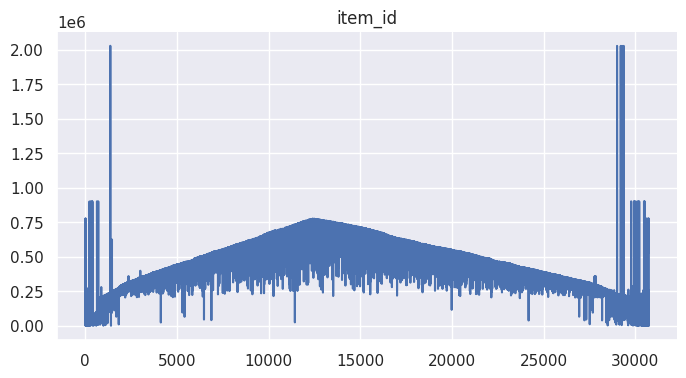

In [130]:
from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='line', figsize=(8, 4), title='item_id')
plt.gca().spines[['top', 'right']].set_visible(False)

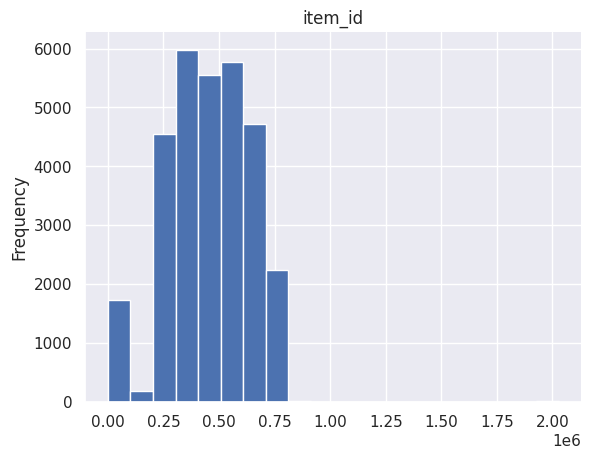

In [129]:
from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='hist', bins=20, title='item_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [128]:
df_recomendacion_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30738 entries, 0 to 30737
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   app_name  30737 non-null  object 
 1   item_id   30736 non-null  float64
dtypes: float64(1), object(1)
memory usage: 480.4+ KB


In [131]:
# Une ambos dataframes
df_recomendacion_games = df_recomendacion_games.merge(df_recomendacion_user , on='item_id', how='right')
df_recomendacion_games

,app_name,item_id,user_id,recommend,sentiment_analysis
0,Killing Floor,1250.0,76561197970982479,True,2
1,NaN,251610.0,js41637,True,2
2,Risk of Rain,248820.0,evcentric,True,2
3,The Wolf Among Us,250320.0,doctr,True,2
4,DARK SOULS™: Prepare To Die™ Edition,211420.0,maplemage,True,1
...,...,...,...,...,...
55827,PlanetSide 2,218230.0,,True,2
55828,Millie,294230.0,,True,1
55829,Counter-Strike Nexon: Zombies,273110.0,,True,1
55830,Who's Your Daddy,427730.0,,True,1


from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='hist', bins=20, title='item_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_recomendacion_games['sentiment_analysis'].plot(kind='hist', bins=20, title='sentiment_analysis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_recomendacion_games.plot(kind='scatter', x='item_id', y='sentiment_analysis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='line', figsize=(8, 4), title='item_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_recomendacion_games['sentiment_analysis'].plot(kind='line', figsize=(8, 4), title='sentiment_analysis')
plt.gca().spines[['top', 'right']].set_visible(False)

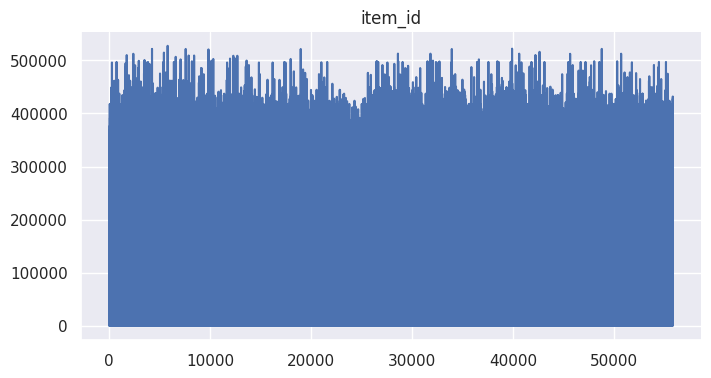

In [133]:
from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='line', figsize=(8, 4), title='item_id')
plt.gca().spines[['top', 'right']].set_visible(False)

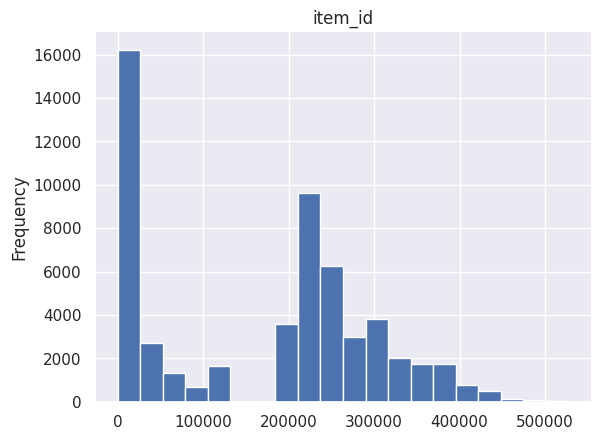

In [132]:
from matplotlib import pyplot as plt
df_recomendacion_games['item_id'].plot(kind='hist', bins=20, title='item_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [134]:
#Elimina la columna item_id
df_recomendacion_games.drop(['item_id'], axis=1, inplace=True)
df_recomendacion_games

,app_name,user_id,recommend,sentiment_analysis
0,Killing Floor,76561197970982479,True,2
1,NaN,js41637,True,2
2,Risk of Rain,evcentric,True,2
3,The Wolf Among Us,doctr,True,2
4,DARK SOULS™: Prepare To Die™ Edition,maplemage,True,1
...,...,...,...,...
55827,PlanetSide 2,,True,2
55828,Millie,,True,1
55829,Counter-Strike Nexon: Zombies,,True,1
55830,Who's Your Daddy,,True,1


from matplotlib import pyplot as plt
df_recomendacion_games['sentiment_analysis'].plot(kind='hist', bins=20, title='sentiment_analysis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_recomendacion_games['sentiment_analysis'].plot(kind='line', figsize=(8, 4), title='sentiment_analysis')
plt.gca().spines[['top', 'right']].set_visible(False)

In [135]:
df_recomendacion_games = df_recomendacion_games.dropna(subset=['user_id'])
df_recomendacion_games = df_recomendacion_games[df_recomendacion_games['user_id'] != '']

In [136]:
# Tomar una muestra aleatoria del 0.2% del DataFrame
df_recomendacion_user = df_recomendacion_games.sample(frac=0.2, random_state=1234)
df_recomendacion_user.shape

(5154, 4)

In [137]:
df_recomendacion_user

,app_name,user_id,recommend,sentiment_analysis
23426,NaN,olakmoba,True,2
14494,Unturned,76561198065414275,True,1
9386,Team Fortress 2,76561198079246056,True,1
21027,Stardew Valley,76561198059963566,True,2
4470,Counter-Strike: Global Offensive,76561198084685872,True,0
...,...,...,...,...
7729,Unturned,zrustz16,True,1
2392,Portal 2,76561198023133231,True,1
5309,PAYDAY 2,76561198046120865,True,2
22367,Spiral Knights,Egames101,True,1


from matplotlib import pyplot as plt
df_recomendacion_user['sentiment_analysis'].plot(kind='hist', bins=20, title='sentiment_analysis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_recomendacion_user['sentiment_analysis'].plot(kind='line', figsize=(8, 4), title='sentiment_analysis')
plt.gca().spines[['top', 'right']].set_visible(False)

In [138]:
# Restablecer el índice del DataFrame
df_recomendacion_user = df_recomendacion_user.reset_index(drop=True)

In [139]:
# Exportar Parquet

#Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_parquet = 'df_recomendacion_user.parquet'
ruta_guardado = '/content/drive/MyDrive/MLOPS - ALLAN/5- DATA_LIMPIA_PARQUET/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_parquet

# Exporta el DataFrame a un archivo parquet
df_recomendacion_user.to_parquet(ruta_completa, engine='pyarrow')

# Imprime un mensaje de confirmación
print(f"DataFrame exportado exitosamente en formato parquet a: {ruta_completa}")

DataFrame exportado exitosamente en formato parquet a: /content/drive/MyDrive/MLOPS - ALLAN/5- DATA_LIMPIA_PARQUET/df_recomendacion_user.parquet


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


def recomendacion_usuario(user_id, df_rec_reviews_muestra):
    # Crear una instancia de TfidfVectorizer con stop words en inglés
    tfidf = TfidfVectorizer(stop_words='english')

    # Rellenar los valores nulos en la columna 'app_name' con una cadena vacía
    df_recomendacion_user['app_name'] = df_recomendacion_user['app_name'].fillna('')

    # Aplicar la transformación TF-IDF a los datos de la columna 'app_name'
    tfidf_matrix = tfidf.fit_transform(df_recomendacion_user['app_name'])

    # Calcular la similitud coseno entre los juegos utilizando linear_kernel
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Obtener el índice del usuario específico en el DataFrame
    matching_users = df_recomendacion_user[df_recomendacion_user['user_id'] == user_id]

    if not matching_users.empty:
        user_index = matching_users.index[0]

        # Obtener las recomendaciones basadas en similitud coseno y los filtros requeridos
        recommendations = []
        seen_games = set()  # Utilizar un conjunto para evitar duplicados
        for i, score in sorted(enumerate(cosine_sim[user_index]), key=lambda x: x[1], reverse=True):
            if df_recomendacion_user['recommend'][i] and df_recomendacion_user['sentiment_analysis'][i] in [0, 1, 2]:
                app_name = df_recomendacion_user['app_name'][i]
                if app_name not in seen_games:
                    recommendations.append((app_name, score))
                    seen_games.add(app_name)

        # Seleccionar las primeras 5 recomendaciones
        top_recommendations = recommendations[:5]

        # Imprimir las recomendaciones
        print(f"Top 5 juegos recomendados para el usuario {user_id}:")
        for app_name, score in top_recommendations:
            print(f"{app_name} - Similaridad: {score}")
    else:
        print(f"No se encontró el usuario con ID: {user_id}")








In [141]:
# Uso de la función
recomendacion_usuario('greenfuzzie23', df_recomendacion_user)

Top 5 juegos recomendados para el usuario greenfuzzie23:
Left 4 Dead 2 - Similaridad: 1.0000000000000002
Left 4 Dead - Similaridad: 1.0000000000000002
Dead Space - Similaridad: 0.42489226062615293
Dead Sky - Similaridad: 0.42018972622956396
The Walking Dead - Similaridad: 0.4111403267964344
